Low-Rationality Game Theory: Evolution and Learning
=======

Shane Steinert-Threlkeld  
https://www.shane.st  
S.N.M.Steinert-Threlkeld AT uva DOT nl  

In [1]:
%%HTML
<style type="text/css">
.rendered_html tbody tr td:first-child {
    border-right: 1px solid black;
}
    
.rendered_html table {
    font-size: 28px;
}
</style>

Last Week
-----

Game theory, as multi-agent decision (rational choice) theory:
* Normal form:
    - Pareto optimality, iterated removal of dominant strategies, Nash equilibria
* Extensive form:
    - conversion to normal form, subgame perfect equilibria, imperfect information

This Week
-----

_Low rationality_ game theory.  How does game theory relate to observed behavior?

* High rationality: via common knowledge of rationality
* Low rationality: dynamics over time evolution and/or learning
    - presupposes much less, often not even knowledge of the game being played

Today
----

Evolutionary game theory:
* Evolutionarily stable strategy
* Replicator dynamics

Intro to Reinforcement Learning:
* Multi-armed bandits

Next time: applications to signaling games (+ overview of final project, which is related)

A Motivating Example
-----

| &#160; | hawk | dove |
| ----- | ----- | ----- |
| hawk | -2, -2 | 6, 0 |
| dove | 0, 6 | 3, 3 |

(Maynard-Smith and Price)

The Key Idea
-----

What kinds of _populations_ of agents playing these actions would be _resistant to invasion_ by other populations?

Populations as Mixed Strategies
------

Given a game $G = \langle \{ 1, 2 \} , \{ A, A \}, \{u_i\} \rangle$, consider a population of agents that may, at each time step, get randomly paired to play $G$.

* $P_a$: the number of agents in $P$ who play action $a$
* $F_a := P_a / \sum_{a' \in A} P_{a'}$: the proportion of the population playing $a$

**Observe:** the vector $(F_a)_{a \in A}$ is a _mixed strategy_: a probability distribution over actions.

Hawk-Dove, intuitively
-----

* Dove is not stable: a population of doves can be invaded by some hawks, who will do better against the doves than the doves

* Hawk is also not stable: an invading sub-population of doves will do better against the hawks than they do against themselves

Evolutionarily Stable Strategy
-----

**Definition:** Given a two-player normal form game $G$, mixed strategy $s$ is _evolutionarily stable_ if and only if: for every other $s'$, either
* $u(s, s) > u(s', s)$, or:
* $u(s, s) = u(s', s)$ and $u(s, s') > u(s', s')$

(Think of $s$ as native population, $s'$ as invaders.)

**Fact:** $s$ is evolutionarily stable if and only if for some $\epsilon > 0$ and all other $s'$: $$u(s , (1-\epsilon)\cdot s + \epsilon \cdot s') > u(s', (1-\epsilon)\cdot s + \epsilon \cdot s')$$

ESS in Hawk-Dove
-----

* $H$ is not an ESS: $u(D, H) > u(H, H)$
* $D$ is not an ESS: $u(H, D) > u(D, D)$

ESS and Nash
-----

* $s = (3/5, 2/5)$ is the unique Nash equilibrium, and also the unique ESS

* ESS $\Rightarrow$ Nash
* Strict Nash $\Rightarrow$ ESS

(Replicator) Dynamics
----

ESS is still a _static_ solution concept, even though the motivations for it are dynamic (e.g. about invasion).

The _replicator dynamic_ captures the idea of frequency-dependent selection: how much an action proliferates depends on the frequency of all the actions in the population.

Helper Definitions
------

* Fitness of action $a$ in population $s$: $$F(a, s) := \sum_j u(a, s_j)$$
* Average fitness of a population: $$F(s) := \sum_j s_j \cdot u(a_j, s) = u(s, s)$$

Replicator Dynamic, Formally
------

The replicator dynamic is the following system of _ordinary differential equations_:
$$\frac{ds_i}{dt} = s_i\left( F(a_i, s) - F(s) \right)$$

* Actions that do better than average propagate
* Actions that do worse than average diminish

In [63]:
%matplotlib inline

import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 150 # makes plots bigger

Fitness of an Action
-----

In [5]:
def fitness(act, population, game):
    return np.dot(game, population)[act]

MAD = np.array([
    [0, -10],
    [10, -8]
])

fitness(1, [0.5, 0.5], MAD)

1.0

Average Fitness
----

In [51]:
def average_fitness(population, game):
    return np.average(np.dot(game, population), weights=population)

average_fitness([0.5, 0.5], MAD)

-2.0

Replicator Dynamic in Python
----

In [45]:
def replicator(population, game, t):
    # allow act_fitness to apply to list of acts
    act_fitness = np.vectorize(lambda act: fitness(act, population, game))
    all_acts = np.arange(len(population))
    return population*(act_fitness(all_acts) - average_fitness(population, game))

In [80]:
def plot_replicator(game, t=np.arange(0, 10, 0.1), title='RD Example'):
    for act0 in np.arange(0.1, 1, .1):
        init_pop = [act0, 1-act0]
        # integrate the differential equations!
        ys = odeint(lambda population, t: replicator(population, game, t), init_pop, t)
        # plot proportion of population playing act 0
        y_act_0 = ys[:, 0]
        plt.plot(t, y_act_0)
    plt.title(title)
    plt.ylabel('Prob(act0)')
    plt.show()

RD Applied to MAD
----

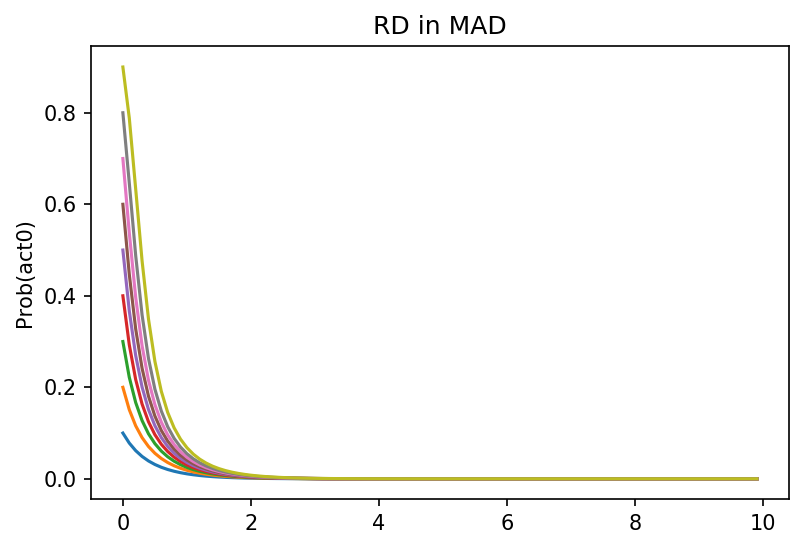

In [64]:
plot_replicator(MAD, title='RD in MAD')

RD Applied to Hawk-Dove
----

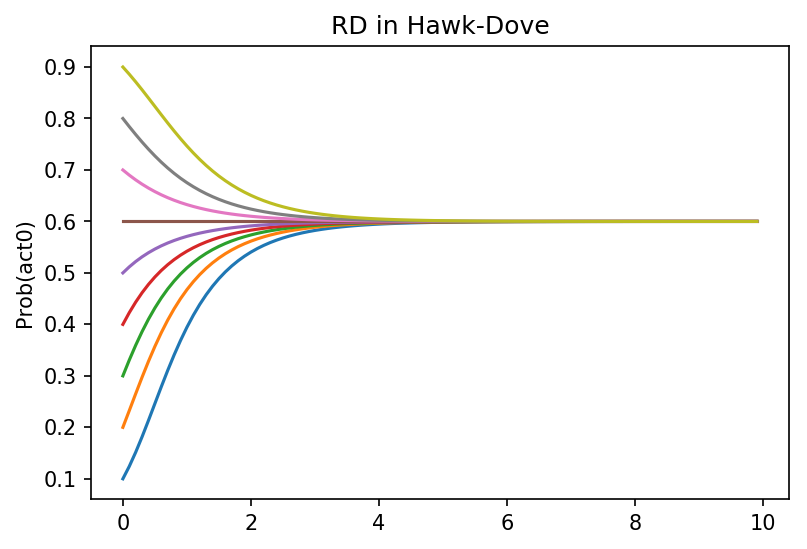

In [65]:
plot_replicator(np.array([
    [-2, 6],
    [0, 3]
]), title='RD in Hawk-Dove')

RD Applied to Penalty Kick
----

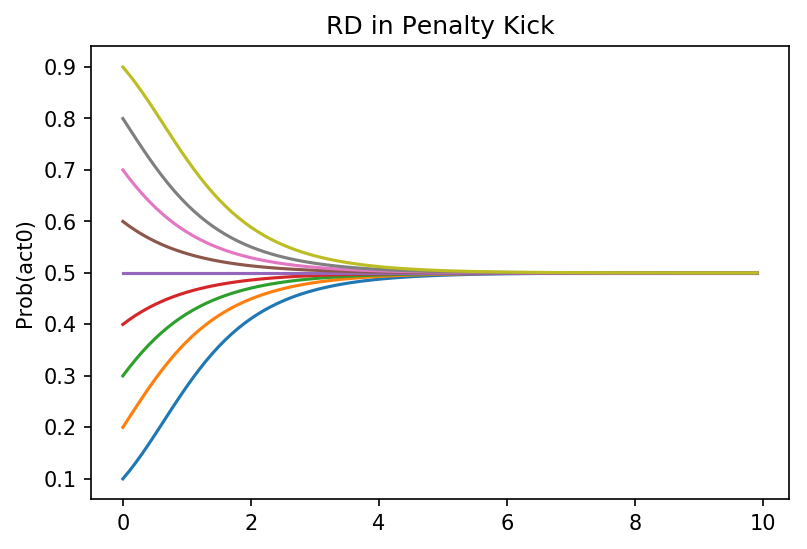

In [67]:
plot_replicator(np.array([
    [-1, 1],
    [1, -1]
]), title='RD in Penalty Kick')

Dynamic Properties
----

Three ways that $s$ can be "well-behaved" in the dynamics:

* _rest point_: $\frac{ds}{dt} = 0$
    
    If you're at $s$, you stay at $s$.

* _stable point_: there is an $\epsilon > 0$ s.t. for every $\epsilon$-ball $U$ around $s$, there is a ball $U'$ around $s$ such that if $s_0 \in U'$, then $s_t \in U$ for every $t > 0$

    If you start near $s$, you stay near $s$.

* _asymptotically stable_: $s$ is stable and for every $\epsilon$-ball $U$ around $s$, if $s_0 \in U$, then $$\lim_{t \to \infty} s_t = s$$  

    Every point near $s$ gets 'drawn into' $s$.

Relations Between Dynamic and Static Concepts
-----

* $(s, s)$ Nash $\Rightarrow$ $s$ is a rest point of RD
* $s$ a stable point of RD $\Rightarrow$ $(s, s)$ Nash  
    (Exercise: every _pure strategy_ is a rest point of RD, but most of them are not Nash.)
* $s$ is an ESS $\Rightarrow$ $s$ is asymptotically stable in RD

(Note: in the three examples above, there is an asymptotically stable point.)

Stag Hunt
----

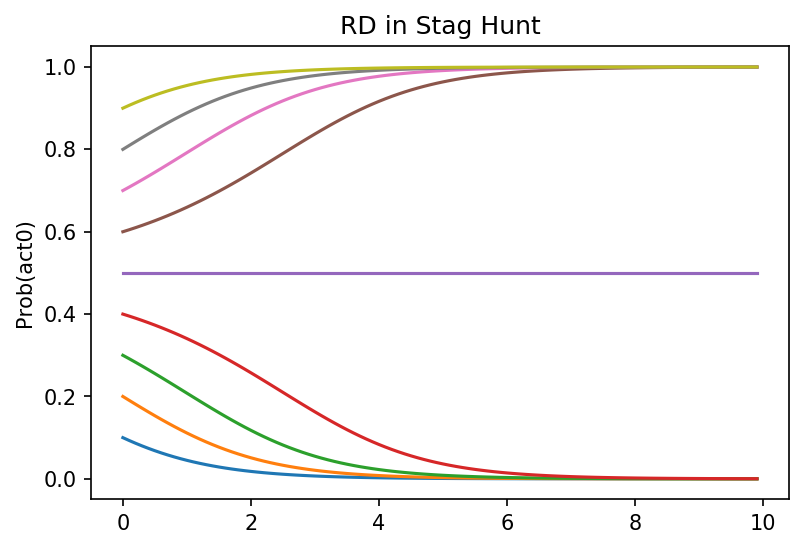

In [79]:
plot_replicator(np.array([
    [2, 0],
    [1, 1]
]), title='RD in Stag Hunt')

The mixed-strategy NE $(0.5, 0.5)$ is a _rest point_, but neither stable nor aysmptotically.

One More Example: Rock-Paper-Scissors
----

| &#160; | rock | paper | scissors |
| ----- | ----- | ----- | ----- |
| rock | 0, 0 | -1, 1 | 1, -1 |
| paper | 1, -1 | 0, 0 | -1, 1 |
| scissors | -1, 1 | 1, -1 | 0, 0 |

In [76]:
def plot_replicator_2d(game, t=np.arange(0, 50, 0.1), title='RD Example'):
    for act0 in np.arange(0.05, 0.95, .1):
        for act1 in np.arange(0.05, 1-act0, .1):
            init_pop = [act0, act1, 1 - (act0 + act1)]
            ys = odeint(lambda population, t: replicator(population, game, t), init_pop, t)
            act_0 = ys[:, 0]
            act_1 = ys[:, 1]
            plt.plot(act_0, act_1)
    plt.title(title)
    plt.xlabel('Prob(act0)')
    plt.ylabel('Prob(act1)')
    plt.show()

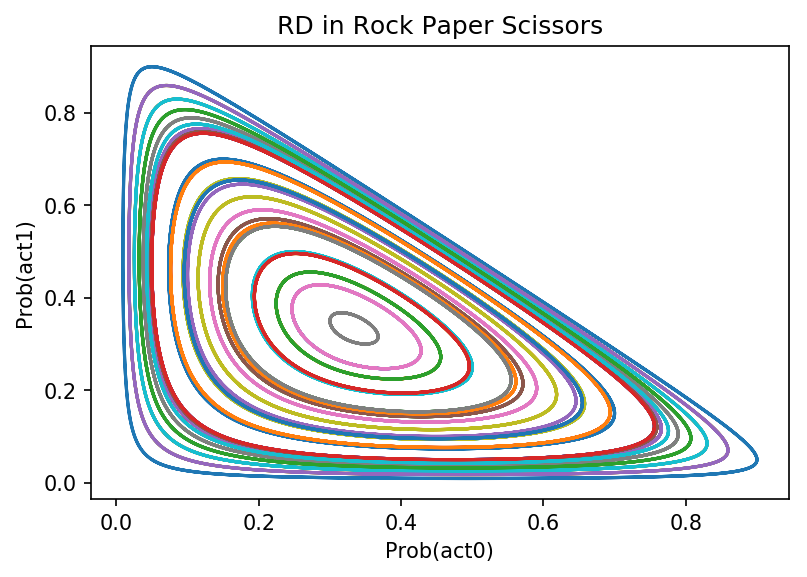

In [77]:
plot_replicator_2d(np.array([
    [0, -1, 1],
    [1, 0, -1],
    [-1, 1, 0]
]), title='RD in Rock Paper Scissors')

The mixed-strategy NE $(1/3, 1/3, 1/3)$ is a stable rest point, but is not asymptotically stable.

Evolutionary Game Theory, Summary
-----

* Evolutionarily stable strategy
* Replicator dynamic
    - frequency-dependent selection
* Relations between: Nash, ESS, rest/stable/asymptotically stable points
* Much more not covered here, including _mutation_

(Reinfocement) Learning
------

Learning in Games
-----

Generally: update your behavior based on the _past_, in some particular way.  Some popular examples:
* fictitious play: in a repeated game, assume your opponents' empirical frequencies are their mixed strategies, and best respond to those
* Bayesian learning: after each round of the game, update beliefs by Bayes

All of these presuppose _knowledge of the game being played_.

Reinforcement Learning
------

Feedback from the environment (_rewards_) based on your action, in a loop over time.

![](imgs/RL.png)

Source: Megajuice, on Wikipedia, CC0 license

Shockingly Powerful
-----

![](imgs/AlphaZero.gif)

Source: _Science_ Magazine

In [81]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/TmPfTpjtdgg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Single Agent: Markov Decision Process
----

* A _Markov decision process_ is a tuple $\langle S, A, P_a, R_a \rangle$:
    - states
    - actions
    - $P_a(s' | s)$: probability of transitioning to state $s'$ after agent takes $a$ in $s$
    - $R_a(s, s')$: agent's reward upon a transition from $s$ to $s'$ following $a$

The goal: find a (stochastic) policy $\pi : S \to A$ that maximizes some function of the cumulated rewards.

(Note: the multi-agent generalization is called a _stochastic game_.)

Example: Multi-Armed Bandit
------

In [102]:
machines = [0.2, 0.7, 0.4]

def get_bandit_reward(choice, machines):
    return int(np.random.random() < machines[choice])

In [113]:
def belief_to_prob(beliefs, temp=None):
    # if temp is specified, do a soft-max
    if temp:
        beliefs = np.exp(beliefs / temp)
    return beliefs / np.sum(beliefs)

def choose(beliefs, temp=None):
    return np.random.choice(range(len(beliefs)), p=belief_to_prob(beliefs, temp=temp))

In [120]:
agent_belief = np.ones(len(machines))*10

for _ in range(2500):
    # agent chooses
    choice = choose(agent_belief)  # try, e.g. temp=10 here, for softmax
    # gets reward
    reward = get_bandit_reward(choice, machines)
    # updates accumulated rewards
    agent_belief[choice] += reward
    print(belief_to_prob(agent_belief))

[0.33333333 0.33333333 0.33333333]
[0.33333333 0.33333333 0.33333333]
[0.33333333 0.33333333 0.33333333]
[0.33333333 0.33333333 0.33333333]
[0.33333333 0.33333333 0.33333333]
[0.32258065 0.35483871 0.32258065]
[0.32258065 0.35483871 0.32258065]
[0.3125 0.375  0.3125]
[0.3030303  0.39393939 0.3030303 ]
[0.3030303  0.39393939 0.3030303 ]
[0.3030303  0.39393939 0.3030303 ]
[0.3030303  0.39393939 0.3030303 ]
[0.29411765 0.41176471 0.29411765]
[0.29411765 0.41176471 0.29411765]
[0.29411765 0.41176471 0.29411765]
[0.28571429 0.42857143 0.28571429]
[0.28571429 0.42857143 0.28571429]
[0.27777778 0.41666667 0.30555556]
[0.27777778 0.41666667 0.30555556]
[0.27777778 0.41666667 0.30555556]
[0.27777778 0.41666667 0.30555556]
[0.27777778 0.41666667 0.30555556]
[0.27777778 0.41666667 0.30555556]
[0.27027027 0.43243243 0.2972973 ]
[0.28947368 0.42105263 0.28947368]
[0.28205128 0.43589744 0.28205128]
[0.28205128 0.43589744 0.28205128]
[0.275 0.45  0.275]
[0.275 0.45  0.275]
[0.275 0.45  0.275]
[0.2682

[0.04979253 0.82365145 0.12655602]
[0.04968944 0.82401656 0.126294  ]
[0.04968944 0.82401656 0.126294  ]
[0.04958678 0.82438017 0.12603306]
[0.04958678 0.82438017 0.12603306]
[0.04948454 0.82474227 0.1257732 ]
[0.04938272 0.82510288 0.1255144 ]
[0.04938272 0.82510288 0.1255144 ]
[0.04928131 0.82546201 0.12525667]
[0.04918033 0.82581967 0.125     ]
[0.04918033 0.82581967 0.125     ]
[0.04918033 0.82581967 0.125     ]
[0.04918033 0.82581967 0.125     ]
[0.04907975 0.82617587 0.12474438]
[0.04907975 0.82617587 0.12474438]
[0.04907975 0.82617587 0.12474438]
[0.04897959 0.82653061 0.1244898 ]
[0.04887984 0.82688391 0.12423625]
[0.04878049 0.82723577 0.12398374]
[0.04868154 0.82758621 0.12373225]
[0.048583   0.82793522 0.12348178]
[0.04848485 0.82828283 0.12323232]
[0.04848485 0.82828283 0.12323232]
[0.0483871 0.8266129 0.125    ]
[0.0483871 0.8266129 0.125    ]
[0.04828974 0.82696177 0.12474849]
[0.04819277 0.82730924 0.12449799]
[0.04819277 0.82730924 0.12449799]
[0.04819277 0.82730924 0.1

[0.03232759 0.87607759 0.09159483]
[0.03229279 0.87621098 0.09149623]
[0.03225806 0.87634409 0.09139785]
[0.03222342 0.87647691 0.09129968]
[0.03218884 0.87660944 0.09120172]
[0.03215434 0.87674169 0.09110397]
[0.03211991 0.87687366 0.09100642]
[0.03208556 0.87700535 0.09090909]
[0.03205128 0.87713675 0.09081197]
[0.03201708 0.87726788 0.09071505]
[0.03201708 0.87726788 0.09071505]
[0.03198294 0.87739872 0.09061834]
[0.03198294 0.87739872 0.09061834]
[0.03194888 0.87752929 0.09052183]
[0.03194888 0.87752929 0.09052183]
[0.03194888 0.87752929 0.09052183]
[0.03191489 0.87765957 0.09042553]
[0.03188098 0.87778959 0.09032944]
[0.03184713 0.87791932 0.09023355]
[0.03181336 0.87804878 0.09013786]
[0.03177966 0.87817797 0.09004237]
[0.03177966 0.87817797 0.09004237]
[0.03174603 0.87830688 0.08994709]
[0.03174603 0.87830688 0.08994709]
[0.03171247 0.87843552 0.08985201]
[0.03171247 0.87843552 0.08985201]
[0.03167899 0.87856389 0.08975713]
[0.03167899 0.87856389 0.08975713]
[0.03167899 0.878563

[0.02785924 0.89516129 0.07697947]
[0.02783883 0.8952381  0.07692308]
[0.02783883 0.8952381  0.07692308]
[0.02783883 0.8952381  0.07692308]
[0.02783883 0.8952381  0.07692308]
[0.02783883 0.8952381  0.07692308]
[0.02781845 0.89531479 0.07686676]
[0.0277981  0.89539137 0.07681053]
[0.0277981  0.89539137 0.07681053]
[0.0277981  0.89539137 0.07681053]
[0.02777778 0.89546784 0.07675439]
[0.02775749 0.89554419 0.07669832]
[0.02773723 0.89562044 0.07664234]
[0.02771699 0.89569657 0.07658643]
[0.02769679 0.89504373 0.07725948]
[0.02767662 0.89512017 0.0772032 ]
[0.02767662 0.89512017 0.0772032 ]
[0.02767662 0.89512017 0.0772032 ]
[0.02765648 0.89519651 0.07714702]
[0.02763636 0.89527273 0.07709091]
[0.02761628 0.89534884 0.07703488]
[0.02759622 0.89542484 0.07697894]
[0.02759622 0.89542484 0.07697894]
[0.0275762  0.89550073 0.07692308]
[0.0275762  0.89550073 0.07692308]
[0.0275762  0.89550073 0.07692308]
[0.0275562 0.8955765 0.0768673]
[0.02753623 0.89565217 0.07681159]
[0.02751629 0.89572773 

RL, in short
-----

Simply by acting in an unknown environment, receiving rewards on the basis of those actions, and changing one's future behavior in response, very _intelligent-looking_ behavior can spontaneously emerge.

Many, many topics not covered:
* value iteration, Q-learning, TD learning
* optimality guarantees
* policy gradient methods and refinements (very popular in ML now)

For more, _the_ book on RL (Sutton and Barto) is freely available: http://incompleteideas.net/book/the-book-2nd.html

Summary
-----

Intelligent behavior in multi-agent interactions can emerge under much weaker assumptions than common knowledge of rationality:
* evolution
* learning

Next time:
* both applied to _signaling games_, modeling the emergence of natural language
* walk-through of final project
    - for preparation, you can read: https://arxiv.org/abs/1612.07182